In [2]:
from pylab import *
from scipy.integrate import *

In [4]:
def mov_planet1(t,x):
    # x es x,y,z,vx,vy,vz
    dx = x[3]
    dy = x[4]
    dz = x[5]
    d32xyz = (x[0]**2 + x[1]**2 + x[2]**2 )**1.5
    dvx = -x[0]/d32xyz
    dvy = -x[1]/d32xyz
    dvz = -x[2]/d32xyz
    return array([ dx , dy , dz , dvx , dvy , dvz ])

In [5]:
cond_ini = [1,0,0,0,1,0]
sol = solve_ivp(mov_planet1 , (0,10*pi) , cond_ini ,
                atol=1e-12,rtol=1e-12)

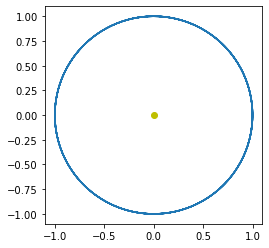

In [7]:
plot([0],[0],'yo')
plot(sol.y[0],sol.y[1])
gca().set_aspect('equal')
show()

In [43]:
def vec_L(datos,n_part=1):
    variables , integraciones = datos.shape
    momento_angular = zeros((3*n_part,integraciones))
    norma_L2 = zeros((n_part,integraciones))
    for i in range(integraciones):
        momento_angular[:,i] = cross(datos[:3,i],datos[3:,i])
        norma_L2[0,i] = norm(momento_angular[:,i])
    return momento_angular,norma_L2

In [45]:
vec_L(sol.y)

(array([[ 0.,  0.,  0., ..., -0., -0., -0.],
        [ 0., -0., -0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]]),
 array([[1., 1., 1., ..., 1., 1., 1.]]))

In [88]:
cond_ini = [1,0,0,0,1,0]
Tierra = solve_ivp(mov_planet1 , (0,10*pi) , cond_ini ,
                atol=1e-12,rtol=1e-12)
cond_ini = [3,0,0,0,0.2,0.2]
Pluton = solve_ivp(mov_planet1 , (0,10*pi) , cond_ini ,
                atol=1e-12,rtol=1e-12)

In [89]:
from mpl_toolkits import mplot3d

In [94]:
%matplotlib inline

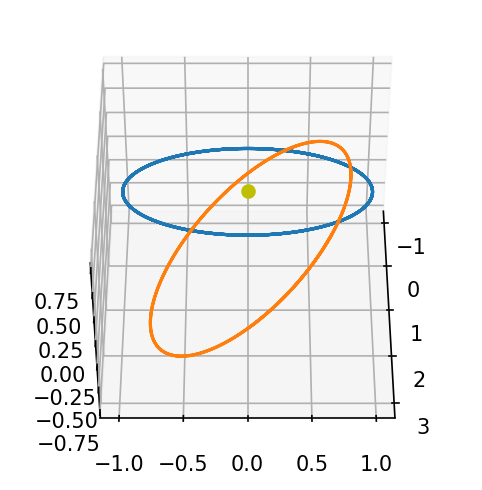

In [105]:
fig = figure(dpi=150)
ejes = axes(projection='3d')
ejes.plot([0],[0],[0],'yo')
ejes.plot(Tierra.y[0],Tierra.y[1],Tierra.y[2])
ejes.plot(Pluton.y[0],Pluton.y[1],Pluton.y[2])
ejes.view_init(45,0)
show()